# HOJA DE TRABAJO 1

## *Problema 1*

Desarrolle una funcion la cual reciba dos parametros, una imagen y un entero llamado color, la
funcion debe devolver una imagen la cual tenga activos los canales de color segun los siguientes
puntos:

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# cargamos imágenes
img = cv2.imread("Wally.jpg")

In [3]:
img.shape #dimensiones

(3648, 5472, 3)

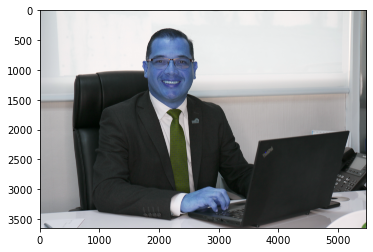

In [4]:
plt.imshow(img)
plt.show()

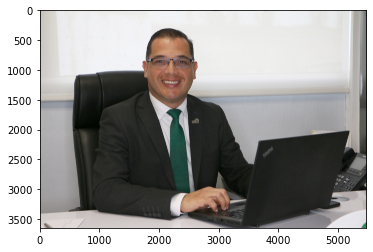

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [6]:
## Creamos las dimensiones y el lienzo de la imágen y separamos los canales
def changeImg(img, color):
    alto = img.shape[0]
    ancho = img.shape[1]    
    nombre_color = ""
    lienzo = np.zeros((alto,ancho, 3))
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i,j]
            red = pixel[0]
            green = pixel[1]
            blue = pixel[2]
            if(color == 1):
                lienzo[i,j] = [blue,0,0]
                nombre_color = "Azul"
            elif(color == 2):
                lienzo[i,j] = [0,green,0]
                nombre_color = "Verde"
            elif(color == 3):
                lienzo[i,j] = [0,0,red]
                nombre_color = "Rojo"
            elif(color == 10):
                lienzo[i,j] = [0,green,red]
                nombre_color = "Rojo_Verde"
            elif(color == 20):
                lienzo[i,j] = [blue,green,0]
                nombre_color = "Verde_Azul"
            elif(color == 30):
                lienzo[i,j] = [blue,0,red]
                nombre_color = "Azul_Rojo"          
     
    write_and_show(lienzo,nombre_color)

In [7]:
##Funcion para guardar y mostrar imégen
def write_and_show(lienzo,nombre_color):
    cv2.imwrite("P_1_"+nombre_color+".jpg", lienzo)
    imgres = cv2.imread("P_1_"+nombre_color+".jpg")
    imgres = cv2.cvtColor(imgres, cv2.COLOR_BGR2RGB)
    plt.imshow(imgres)

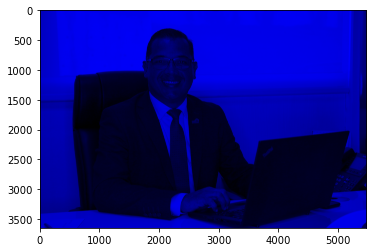

In [8]:
# Si el parametro color vale 1, la imagen debe mostrar activos unicamente el color azul.
changeImg(img,1)

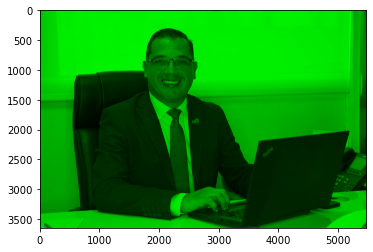

In [9]:
# Si el parametro color vale 2, la imagen debe mostrar activos unicamente el color verde.
changeImg(img,2)

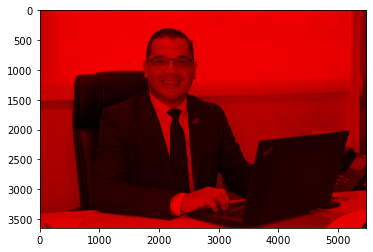

In [10]:
# Si el parametro color vale 3, la imagen debe mostrar activos unicamente el color rojo.
changeImg(img,3)

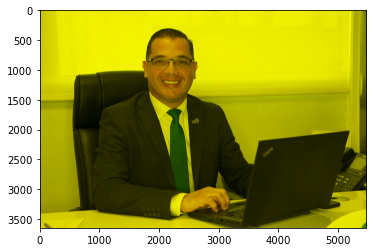

In [11]:
# Si el parametro color vale 10, la imagen debe mostrar activos nicamente los colores rojo y verde.
changeImg(img,10)

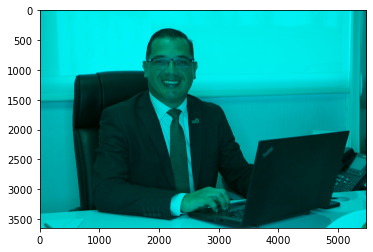

In [12]:
# Si el parametro color vale 20, la imagen debe mostrar activos unicamente los colores verde y azul.
changeImg(img,20)

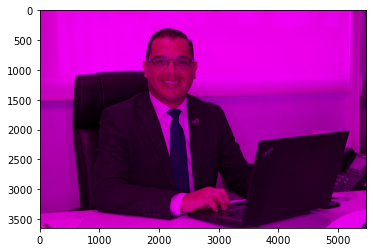

In [13]:
# Si el parametro color vale 30, la imagen debe mostrar activos unicamente los colores azul y rojo.
changeImg(img,30)

## *Problema 2*

En el .zip del laboratorio se le compartio un conjunto de imagenes en escala de grises (imagen1,
imagen2, perro) estas imagenes fueron creadas utilizando una escala de grises en 3D, cree una
funcion que dadas las 3 imagenes se construya la imagen original a color.

## *Problema 3*

Cree una funcion que dada una imagen cree una escala de grises en tres dimensiones, tome en
cuenta que su funcion debe crear 3 imagenes como salida. Para entregar este ejercicio debe incluir
una las imagenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la
imagen del Problema #2.

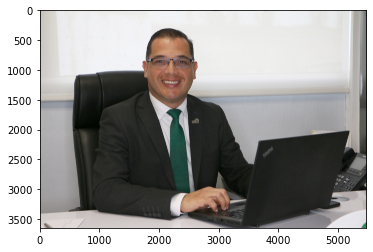

In [14]:
plt.imshow(img)
alto = img.shape[0]
ancho = img.shape[1]  
gray_green = np.zeros((alto,ancho,1))
gray_blue = np.zeros((alto,ancho,1))
gray_red = np.zeros((alto,ancho,1))
gray_aritmetica = np.zeros((alto,ancho,1))
gray_ponderado = np.zeros((alto,ancho,1))

In [15]:
for i in range(0,alto):
    for j in range(0,ancho):
        pixel = img[i,j]
        gray_blue[i,j] = pixel[2]
        gray_green[i,j] = pixel[1]
        gray_red[i,j] = pixel[0]
        
        gray_aritmetica[i,j] = np.mean(pixel)
        gray_ponderado[i,j] = int(0.299*pixel[2] + 0.587*pixel[1] + 0.114*pixel[0])

In [20]:
def write_and_show(strImg, arrImg):
    cv2.imwrite(strImg, arrImg)
    imgTemp = cv2.imread(strImg)
    imgTemp = cv2.cvtColor(imgTemp, cv2.COLOR_BGR2RGB)
    plt.imshow(imgTemp)

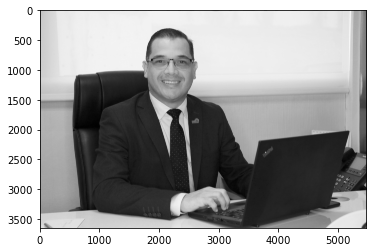

In [21]:
write_and_show("gray_rojo.jpg",gray_red)

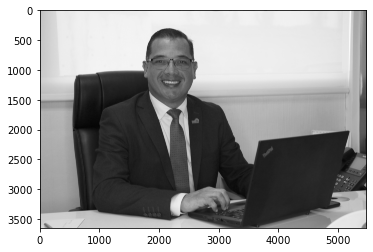

In [22]:
write_and_show("gray_verde.jpg",gray_green)

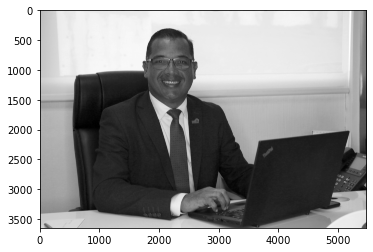

In [23]:
write_and_show("gray_azul.jpg",gray_blue)

## *Problema 4*

Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de
escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funciones
de opencv), sus histogramas deben incluir una lnea vertical la cual muestre el valor de la media
de la distribucion.

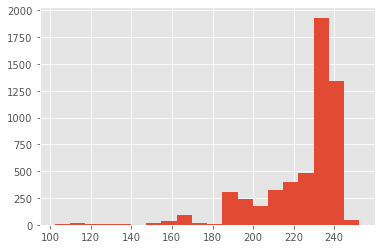

In [27]:
rojo = gray_aritmetica[0]
verde = gray_aritmetica[1]
azul = gray_aritmetica[2]
plt.style.use('ggplot')
plt.hist(rojo, bins=20)
plt.show()

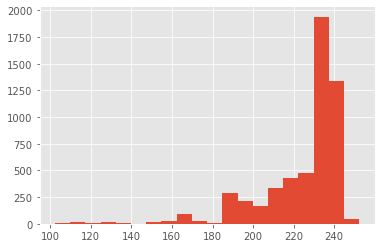

In [28]:
plt.hist(verde, bins=20)
plt.show()

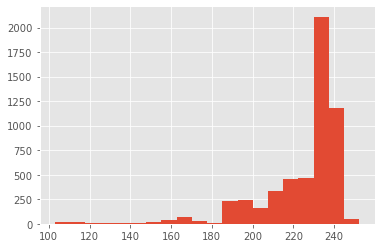

In [29]:
plt.hist(azul, bins=20)
plt.show()

## *Problema 5*

Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una funcion que dada una imagen, realice una escala de grises ponderada (notar que no existe una solucion unica).

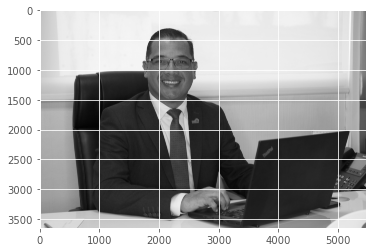

In [33]:
write_and_show("gray_ponderado.jpg",gray_ponderado)

## *Problema 6*

Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho
espacio, para entregar este ejercicio puede hacerlo por medio de Markdown en el mismo Notebook
donde trabajo los demas ejercicios.

El modelo HSV (del inglés Hue, Saturation, Value – Matiz, Saturación, Valor), también llamado HSB (Hue, Saturation, Brightness – Matiz, Saturación, Brillo), define un modelo de color en términos de sus componentes.

En el uso, es común que deseemos elegir un color adecuado para alguna de nuestras aplicaciones, cuando es así resulta muy útil usar la ruleta de color HSV. En ella el matiz se representa por una región circular; una región triangular separada, puede ser usada para representar la saturación y el valor del color. Normalmente, el eje horizontal del triángulo denota la saturación, mientras que el eje vertical corresponde al valor del color. De este modo, un color puede ser elegido al tomar primero el matiz de una región circular, y después seleccionar la saturación y el valor del color deseados de la región triangular.

En la imagen siguiente se muestra el cono de colores del espacio HSV

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f1/HSV_cone.jpg/330px-HSV_cone.jpg){width='100px'}